# Install module with the Gini index


In [1]:
!git clone https://github.com/mmngreco/IneqPy.git
%cd IneqPy
!pip install .

Cloning into 'IneqPy'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 967 (delta 4), reused 13 (delta 2), pack-reused 948
Receiving objects: 100% (967/967), 3.66 MiB | 5.56 MiB/s, done.
Resolving deltas: 100% (497/497), done.
/content/IneqPy
Processing /content/IneqPy
  Created wheel for IneqPy: filename=IneqPy-0.2.0+26.gc860a30-cp36-none-any.whl size=24183 sha256=5d15e7a767193c1e39efe9c83ba317ec0a626ede0eaadf3e46bf1cb844977f58
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2x5hdoz/wheels/c5/e1/00/84bef270544d6978b6b8465069e306b6905c6211cdad48ed36
Successfully built IneqPy


In [8]:
# download sample file
!wget 'https://github.com/ldnl-unam/LDNL/blob/master/indicators/Gini/GINILISLATAM.xlsx?raw=true'

--2019-12-09 18:30:22--  https://github.com/ldnl-unam/LDNL/blob/master/indicators/Gini/GINILISLATAM.xlsx?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ldnl-unam/LDNL/raw/master/indicators/Gini/GINILISLATAM.xlsx [following]
--2019-12-09 18:30:23--  https://github.com/ldnl-unam/LDNL/raw/master/indicators/Gini/GINILISLATAM.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ldnl-unam/LDNL/master/indicators/Gini/GINILISLATAM.xlsx [following]
--2019-12-09 18:30:23--  https://raw.githubusercontent.com/ldnl-unam/LDNL/master/indicators/Gini/GINILISLATAM.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [0]:
# change name
!mv 'GINILISLATAM.xlsx?raw=true.1' 'GINILISLATAM.xlsx'

In [11]:
import pandas as pd

#Read file
DataProduccion = pd.read_excel('GINILISLATAM.xlsx', index_col=0)
DataProduccion.head()

,BRAZIL,MEXICO,CHILE,ARGENTINA,COLOMBIA,CUBA,PERU,JAMAICA,URUGUAY,VENEZUELA,ECUADOR
Year,,,,,,,,,,,
1980',4,2,1,0,0,1,1,0,0,0,0
1981',6,1,2,2,1,0,1,2,0,0,0
1982',3,4,0,0,0,0,1,1,0,0,0
1983',5,1,3,1,0,0,0,0,0,1,0
1984',2,2,1,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
import numpy as np
import ineqpy
import plotly.graph_objects as go

years = DataProduccion.index

#Claculate Gini for every year
G = {}
for year in years:
  G[year] = ineqpy.gini(income=DataProduccion.loc[year].to_numpy())

G

{"1980'": 0.7555555555555559,
 "1981'": 0.6400000000000002,
 "1982'": 0.8222222222222225,
 "1983'": 0.7818181818181822,
 "1984'": 0.8400000000000004,
 "1985'": 0.9142857142857145,
 "1986'": 0.7454545454545457,
 "1987'": 0.9000000000000002,
 "1988'": 0.7250000000000002,
 "1989'": 0.7250000000000002,
 "1990'": 0.9000000000000002,
 "1991'": 0.7333333333333337,
 "1992'": 0.5500000000000003,
 "1993'": 0.7833333333333337,
 "1994'": 0.6615384615384617,
 "1995'": 0.6500000000000004,
 "1996'": 0.8000000000000004,
 "1997'": 0.7777777777777781,
 "1998'": 0.8222222222222224,
 "1999'": 0.8235294117647063,
 "2000'": 0.6518518518518521,
 "2001'": 0.8736842105263162,
 "2002'": 0.7764705882352944,
 "2003'": 0.8476190476190479,
 "2004'": 0.786666666666667,
 "2005'": 0.67741935483871,
 "2006'": 0.756756756756757,
 "2007'": 0.629268292682927,
 "2008'": 0.8715231788079473,
 "2009'": 0.8638036809815955,
 "2010'": 0.7740740740740742,
 "2011'": 0.8226415094339626,
 "2012'": 0.7942028985507249,
 "2013'": 0.721

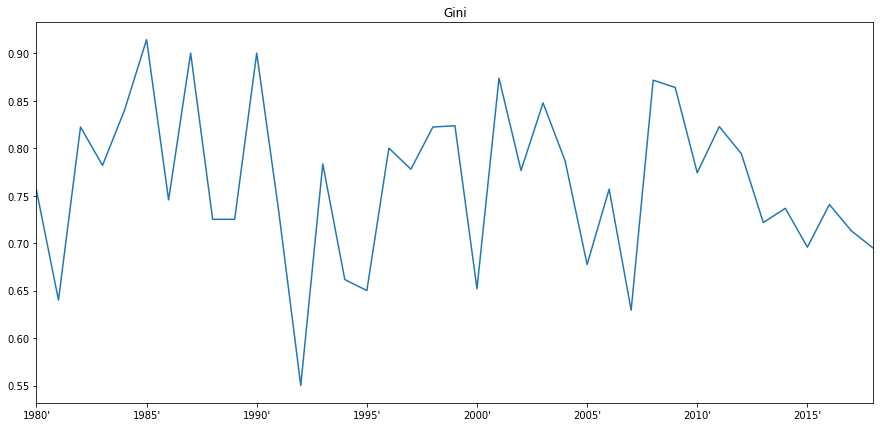

In [13]:
import matplotlib.pylab as plt
#Plot anual Gini
df = pd.DataFrame.from_dict(G, orient='index')
df.plot(figsize=(15,7), title='Gini', legend=False)